End to end ML model using the tools  numpy,Pandas,matplotlib,sklearn 
1. problem definintion
2. data
3. evaluation 
4. Features
5. model
6. exprerimentinf or improving

1) binaryclassification (1 or 0 , yes or no)

based on the patient records can we predict wether he has heart disease or not

## 2) Data

finding the data from repos or kaggle (heart disease UCI)

id (Unique id for each patient)

age (Age of the patient in years)

origin (place of study)
sex (Male/Female)

cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))

chol (serum cholesterol in mg/dl)
fbs (if fasting blood sugar > 120 mg/dl)

restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]

thalach: maximum heart rate achieved

 exang: exercise-induced angina (True/ False)

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment

ca: number of major vessels (0-3) colored by fluoroscopy

thal: [normal; fixed defect; reversible defect]

num: the predicted attribute
## 3.evaluation
when the model reachers 95-98% it is pursued
## 4.Features

all the columns & where youll get different types of information of each features in your data
## 5.model 

In [1]:
#tools
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#MODELS from the sklearn library
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


#evaluation
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,f1_score,recall_score
from sklearn.metrics import RocCurveDisplay

In [2]:
data = pd.read_csv("heart_disease.csv")
data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
data.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [4]:
pd.crosstab(data.sex,data.target)

target,0,1
sex,,
0,24,72
1,114,93


###  Comparing few features in the dataset

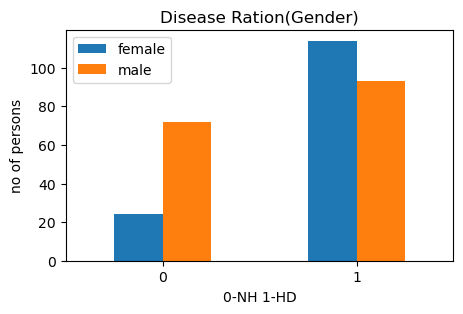

In [5]:
pd.crosstab(data.sex,data.target).plot(kind= "bar",figsize=(5,3));
plt.title("Disease Ration(Gender)");
plt.xlabel("0-NH 1-HD"),plt.ylabel("no of persons");
plt.legend(["female","male"]);
plt.xticks(rotation=0);

# comparing with cp (chest pain)

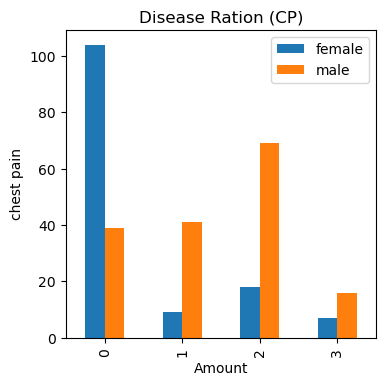

In [6]:
pd.crosstab(data.cp,data.target).plot(kind="bar",figsize=(4,4));
plt.legend(["female","male"]);
plt.xlabel("Amount"),plt.ylabel("chest pain");
plt.title("Disease Ration (CP)");

# comparing with talach of certain age 

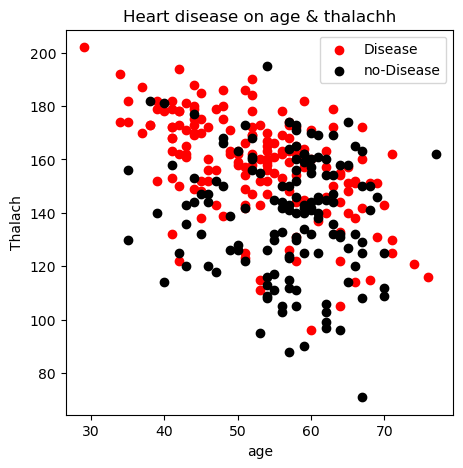

In [7]:
plt.figure(figsize=(5,5));

##scattering with positive rate
plt.scatter(data.age[data.target==1],
                    data.thalach[data.target==1],
           c="red")
##scattering with negative rate
plt.scatter(data.age[data.target==0],
           data.thalach[data.target==0],
           c="black")
plt.title("Heart disease on age & thalachh");
plt.xlabel("age"),plt.ylabel("Thalach");
plt.legend(["Disease","no-Disease"]);

In [8]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


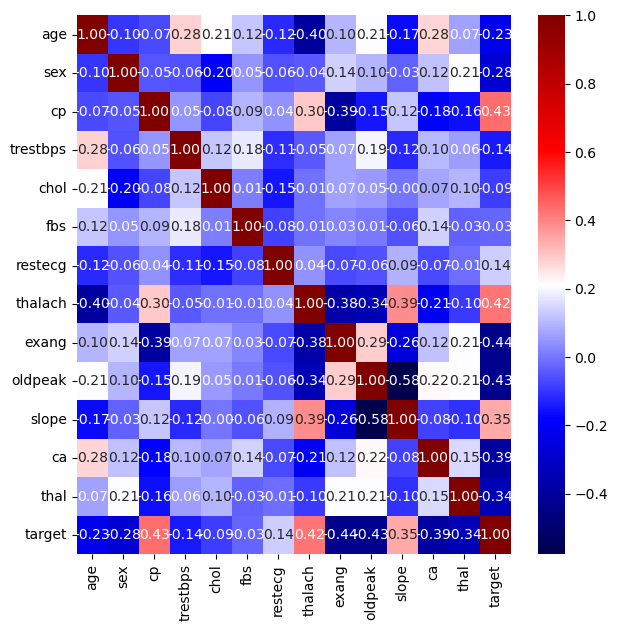

In [9]:
corr_matrix = data.corr()
fig , ax=plt.subplots(figsize=(7,7))
ax=sns.heatmap(corr_matrix,
              annot=True,
              fmt=".2f",
              cmap="seismic")


# preparing data for model

In [10]:
np.random.seed(43)
X= data.drop("target",axis=1)
y=data["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)




# Choosing the model

In [11]:
#in dictionary 
models = {"RandomForestClassifier" : RandomForestClassifier(),
         "KNN" : KNeighborsClassifier(),
         "Logistic ": LogisticRegression()}


def fit_and_score(models , X_train,y_train,X_test,y_test):
    np.random.seed(34)
    #empty dictionary
    model_score= {}
    #looping through the models dictionary
    for name,model in models.items():
        model.fit(X_train,y_train)
        #evlauating and appending into the m_score dictionary
        model_score[name] = model.score(X_test,y_test)
    return model_score
    


In [12]:
model_score = fit_and_score(models= models,
                        X_train=X_train,
                        X_test=X_test,
                        y_train=y_train,
                        y_test=y_test)
model_score 
    

C:\Users\GLohi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'RandomForestClassifier': 0.8688524590163934,
 'KNN': 0.6557377049180327,
 'Logistic ': 0.8852459016393442}

In [13]:
model_comparision = pd.DataFrame(model_score,index=["accuracy"])
model_comparision

,RandomForestClassifier,KNN,Logistic
accuracy,0.868852,0.655738,0.885246


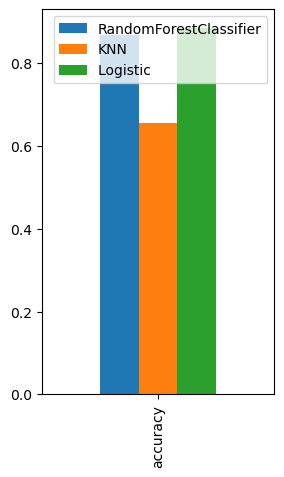

In [14]:
model_comparision.plot(kind="bar",figsize=(3,5));

#Hyperparameter tuning 
#feature importance
#classification metrics ( F1,recall,accuracy,precision)
* confusion matrix
* classification report
* ROC curve
* AUC curve
## hyperparameter tuning in KNN

max KNN score is 72.1311475409836


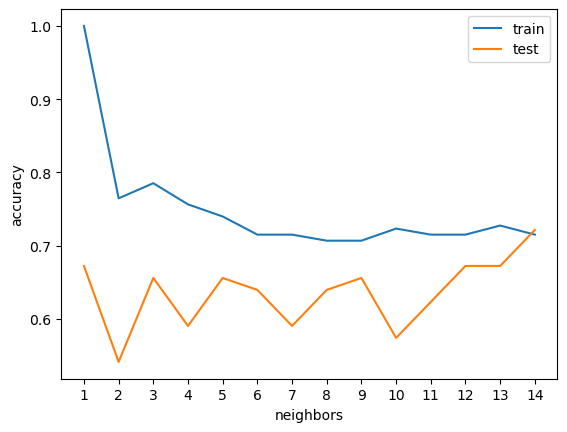

In [15]:
train_scores = []
test_scores = []
#empty lists to append the scores 
neighbors = range(1,15) 
#setting the model 
knn = KNeighborsClassifier()

#loopinf through the n_neighbours
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
#updatind the scores in the empty list
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
plt.xticks(np.arange(1,15,1))
plt.plot(neighbors, train_scores,label="train_scores")
plt.plot(neighbors,test_scores,label="test_scores")
plt.xlabel("neighbors"),plt.ylabel("accuracy")
plt.legend(["train","test"]);
print("max KNN score is",max(test_scores)*100)

 



#  Manually with randomized search 

In [16]:
 LR_grid = {
    "solver" : ["liblinear"],
    "C":np.logspace(-4,4,20)
}

RF_grid = {
    "n_estimators":np.arange(10,200,10),
    "min_samples_split": [5,100],
    "max_depth" : np.arange(2,20,5),
    "min_samples_leaf":np.arange(1,20,2)


}


In [17]:
#np.random.seed(50)

#setup RandomSearchCV for the grid
rs_LOG = RandomizedSearchCV(LogisticRegression(),
                            param_distributions = LR_grid,
                            n_iter = 200,
                            cv = 5,
                            verbose = True)
#fitting the hyperparameters for the Logistic Regrission
rs_LOG.fit(X_train,y_train)
rs_LOG.score(X_test,y_test)

C:\Users\GLohi\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 20 is smaller than n_iter=200. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.9016393442622951

In [18]:
rs_RF = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions= RF_grid,
                          n_iter = 10,
                          verbose = True)
rs_RF.fit(X_train,y_train)
rs_RF.score(X_test,y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


0.8852459016393442



# GridSearchCV for LogisticRegression
* since the logisticReg provides the best score so lets tune and imporve it

In [19]:
#Different parameteres for tuning  logistic Regression 


In [20]:
log_reg_grid = {"C" :np.logspace(-4,4,20),
              "solver" :["liblinear"]}
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv=5,
                          verbose = True)
gs_log_reg.fit(X_train,y_train)
                
    


Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [21]:
gs_log_reg.score(X_test,y_test)

0.9016393442622951

In [22]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

#evaluating our Machine learning classifier beyond the accuracy 
*ROCcurveAUC score
* precision
* confusion matrix
* recall
* f1_score

In [23]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [24]:
y_test

242    0
130    1
208    0
160    1
124    1
      ..
176    0
65     1
11     1
67     1
185    0
Name: target, Length: 61, dtype: int64

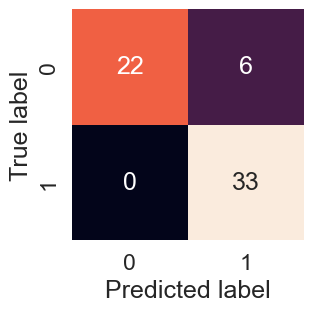

In [25]:
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

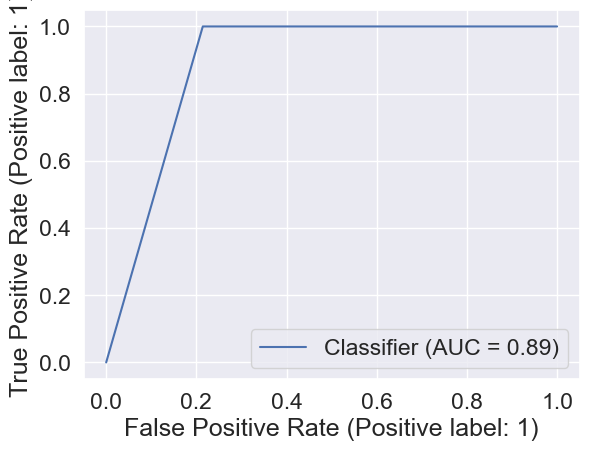

In [41]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test,y_preds)

In [42]:
y_test

242    0
130    1
208    0
160    1
124    1
      ..
176    0
65     1
11     1
67     1
185    0
Name: target, Length: 61, dtype: int64

In [43]:
y_preds

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [44]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        28
           1       0.85      1.00      0.92        33

    accuracy                           0.90        61
   macro avg       0.92      0.89      0.90        61
weighted avg       0.92      0.90      0.90        61



Evaluating using cross_val_score()

In [61]:
from sklearn.model_selection import cross_val_score
#creating new instances for the cv that has best_params
clf = LogisticRegression(C=0.23357214690901212,solver='liblinear')


In [74]:
CV_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy")
CV_acc=CV_acc.mean()
CV_acc

0.8479781420765027

In [76]:
CV_prec = cross_val_score(clf,X,y,scoring="precision")
CV_prec=CV_prec.mean()
CV_prec

0.8215873015873015

In [78]:
CV_recall = cross_val_score(clf,X,y,scoring="recall")
CV_recall=CV_recall.mean()
CV_recall

0.9272727272727274

In [80]:
CV_f1 = cross_val_score(clf,X,y,scoring="f1")
CV_f1=CV_f1.mean()
CV_f1

0.8705403543192143

visualizing all the metrics

<Axes: title={'center': 'CV-Metrics'}>

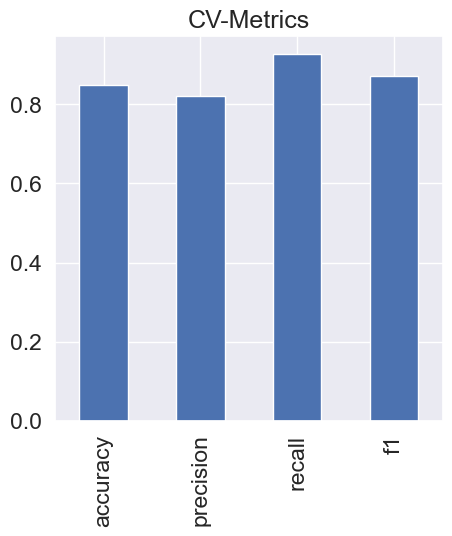

In [95]:
Cv_metrics= pd.DataFrame({"accuracy": CV_acc,
                        "precision":CV_prec,
                        "recall":CV_recall,
                        "f1":CV_f1},
                        index=[0]
                        )
Cv_metrics.T.plot.bar(title = "CV-Metrics",figsize=(5,5),legend=False)

FEATURE IMPORTANCE
 asking which feature contribute to the Outcome and what have they contributed 
 * finding features is different for eachh and every model 
 

In [97]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [108]:
clf = LogisticRegression(C=0.23357214690901212,solver="liblinear")
clf.fit(X_train,y_train)

feature_dict = dict(zip(data.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.006845686021207144,
 'sex': -0.7233451067839188,
 'cp': 0.7276262882006859,
 'trestbps': -0.013754616203905745,
 'chol': -0.0003568435386989958,
 'fbs': 0.015169322672162684,
 'restecg': 0.30534988707397054,
 'thalach': 0.02197150294019502,
 'exang': -0.5385878270236466,
 'oldpeak': -0.4689598807080406,
 'slope': 0.46231179802545586,
 'ca': -0.5549375095089167,
 'thal': -0.6579491527091293}

<Axes: title={'center': 'FEATURE IMPORTANCE'}>

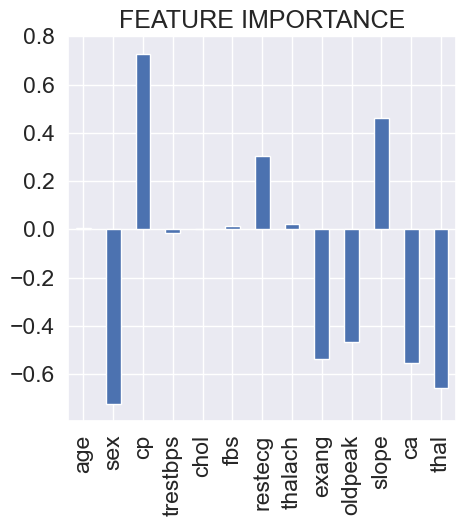

In [117]:
feature_vis= pd.DataFrame(feature_dict,index=[0])
feature_vis.T.plot.bar(title="FEATURE IMPORTANCE",legend=False,figsize=(5,5))